<a href="https://colab.research.google.com/github/jdasam/ant5015-2024/blob/main/notebooks/2nd_week_digital_audio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchaudio

In [2]:
!wget https://www.audiolabs-erlangen.de/resources/MIR/FMP/data/C3/FMP_C3_F03.mp3

--2024-03-11 06:18:47--  https://www.audiolabs-erlangen.de/resources/MIR/FMP/data/C3/FMP_C3_F03.mp3
Resolving www.audiolabs-erlangen.de (www.audiolabs-erlangen.de)... 131.188.16.201
Connecting to www.audiolabs-erlangen.de (www.audiolabs-erlangen.de)|131.188.16.201|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 589377 (576K) [audio/mpeg]
Saving to: ‘FMP_C3_F03.mp3’

FMP_C3_F03.mp3      100%[===================>] 575.56K   789KB/s    in 0.7s    

2024-03-11 06:18:48 (789 KB/s) - ‘FMP_C3_F03.mp3’ saved [589377/589377]



In [4]:
y, sr = torchaudio.load('FMP_C3_F03.mp3')
# y = waveform samples
# sr = sampling rate

In [8]:
y, y.shape
#y.shape = [1, 2149632]
# 1: num channel
# 2149632: num waveform sample

(tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  8.6478e-06,
          -1.9798e-06,  9.9184e-06]]),
 torch.Size([1, 2149632]))

In [12]:
y.shape
None

In [14]:
# 주피터 노트북에서 오디오 재생
import IPython.display as ipd

ipd.display(ipd.Audio('FMP_C3_F03.mp3'))
ipd.Audio(y, rate=sr*2)

In [17]:
# get duration of y in seconds

num_sample = y.shape[1]
# sr: samples / sec
# duration_in_sec: sec

duration_in_sec = num_sample / sr
duration_in_sec

97.48897959183674

In [19]:
# slice from a sec to b sec
a_sec = 10
b_sec = 15

a_in_sample = a_sec * sr
b_in_sample = b_sec * sr

y_sliced = y[:, a_in_sample:b_in_sample]
ipd.Audio(y_sliced, rate = sr)

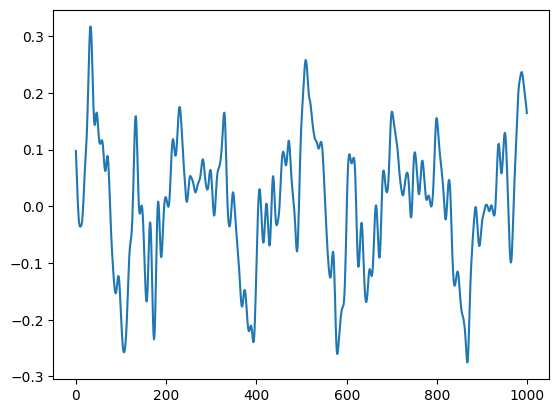

In [24]:
import matplotlib.pyplot as plt

detailed_example = y_sliced[0, 17000:18000]

plt.plot(detailed_example)

torch.Size([1000]) torch.Size([1000])


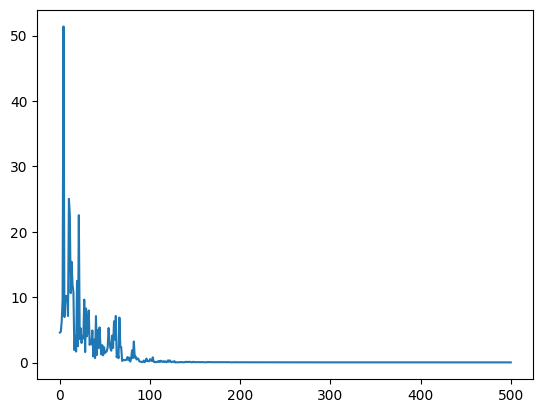

In [29]:
fft_result = torch.fft.fft(detailed_example).abs()
# take absolute value only to ignore phase
print(fft_result.shape, detailed_example.shape)
plt.plot(fft_result[:fft_result.shape[0]//2+1])


22.05

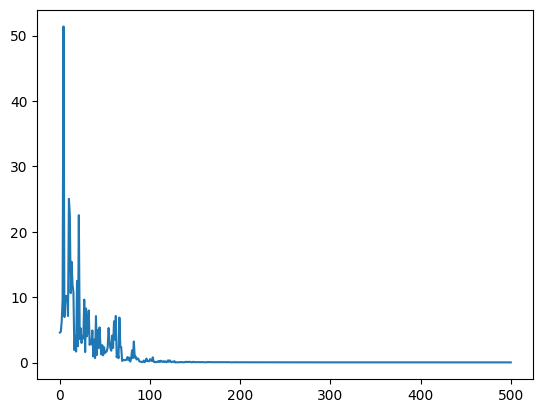

In [31]:
plt.plot(fft_result[:fft_result.shape[0]//2+1])

#fft_result.shape[0] == window_size



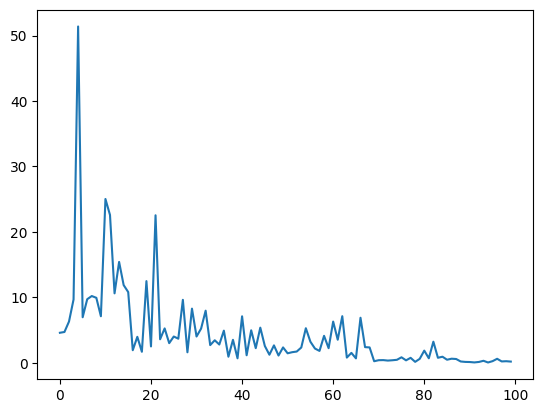

In [33]:
freq_bin_resolution = sr / fft_result.shape[0]
freq_bin_resolution
plt.plot(fft_result[:100])

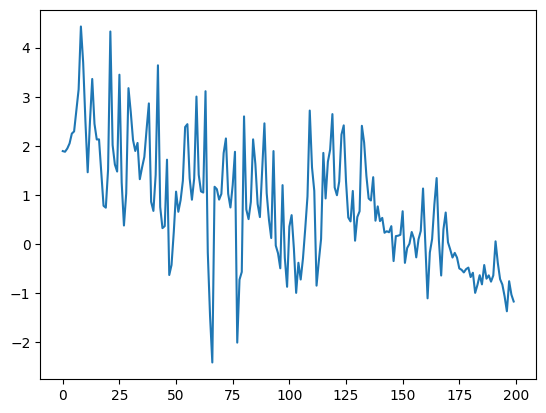

In [35]:
detailed_example = y_sliced[0, 17000:19000]
fft_result = torch.fft.fft(detailed_example).abs()
plt.plot(fft_result[:200].log())

In [37]:
ipd.Audio(detailed_example, rate=sr)

In [73]:
window_size = 2048
hop_size = 1024 # 50% or 25% of window size
window_function = torch.hamming_window(2048)

output = []
for start_idx in range(0, y.shape[1]-window_size, hop_size):
  end_idx = start_idx + window_size
  corresp_slice = y[0, start_idx:end_idx]
  windowed_slice = corresp_slice * window_function
  fft_result = torch.fft.fft(windowed_slice).abs()
  output.append(fft_result)
  # print(start_idx, end_idx, corresp_slice.shape)

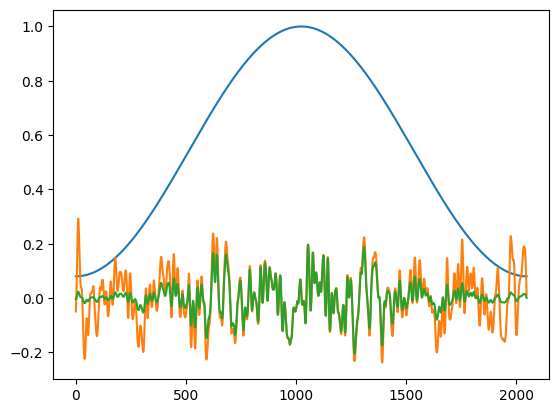

In [69]:
window_function = torch.hamming_window(2048)
plt.plot(window_function)
plt.plot(y[0, 100000:102048])
plt.plot(y[0, 100000:102048] * window_function)

In [46]:
print(len(output)) # num spectrogram time frames
1024 * len(output), y.shape[1]

2098


(2148352, 2149632)

In [74]:
# convert list of tensor into tensor
# output is list of Tensor with Size([2048])
# target_output = 2048 x 2098
stacked_output = torch.stack(output, 1)[:window_size//2+1]
stacked_output.shape

torch.Size([1025, 2098])

In [75]:
stacked_output.max(), stacked_output.mean()

(tensor(199.6596), tensor(0.2121))

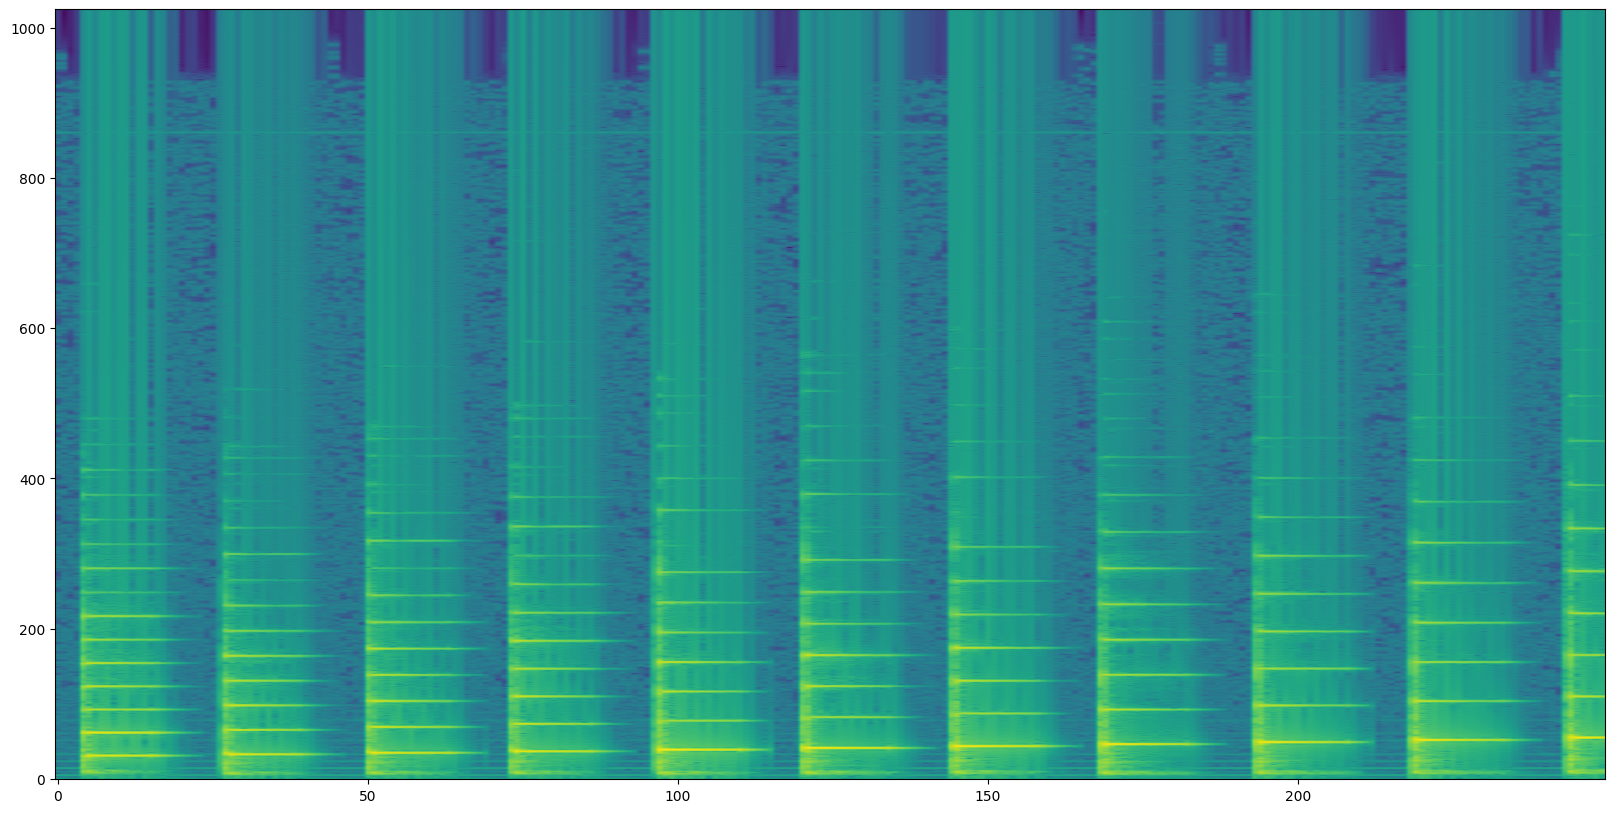

In [78]:
plt.figure(figsize=(20,10))
plt.imshow(stacked_output.log()[:, 1000:1250], origin='lower', aspect='auto')